In [9]:
import networkx 
import random
import numpy as np
import matplotlib.pyplot as plt
#Total number of rounds for simulation
rounds = 1000

# Total population 
N = 1000

#Probability of connection between 2 people in population
P = .01 

#Probabilty of contact with a predefined connection
gamma = .05

#probability of infection give contact with an infected person
beta = .05

#Portion of population vaccinated for test 1
V1 = .85

#Portion of population vaccinated for test 2
V2 = .5
#Generate G(n,p)
G = networkx.binomial_graph(N, P)
adj_matrix = networkx.linalg.graphmatrix.adjacency_matrix(G).todense()

In [10]:
def getCounts(infected, isHealthy):
    healthy = 0
    sick = 0   
    for ea in infected:       
        if (infected[ea] > 0):
            sick +=1
        else:
            healthy +=1
    if(isHealthy):
        return healthy
    else:        
        return sick 

In [11]:
def VaccinatePop(vacNum, arr, N):
    immune = 0
    for i in range(vacNum):
        makeImmune = random.randint(0, N-1)
        
        arr[makeImmune] = -1
        healthy = getCounts(arr, True)
        sick = getCounts(arr, False)
        immune += 1
        #print("Healthy count for vaccination round " + str(i)+ " is: "+ str(healthy))
        #print("Sick count for vaccination round " + str(i)+ " is: "+ str(sick))
        #print("immune count for vaccination round " + str(i)+ " is: "+ str(immune))
    return arr

In [12]:
def graphics(data):
    plt.plot(data)
    plt.ylabel('Total Infected')
    plt.xlabel('Rounds')
    plt.show()
    return

In [13]:
def simulator(rounds, N, gamma, beta, adj_matrix):
    infected = np.zeros((N,),dtype=int) # Array of Healthy people
    infected[1]=1 # 1st person in the Array of healthy people gets infected
    total_infected = np.zeros(rounds) # Array to monitor the total number of infected people in each round
    sick = 1
    healthy= N - sick
    for i in range(rounds):
        infected_index_list = np.nonzero(infected)[0]   #To find the index of the people who are infected
        for index in infected_index_list:    #To Check if the peorson who is infected is still infectious at each round 
            prob_array = np.asarray(adj_matrix[index]) * np.random.rand(N) #get row in adj matrix of infected person and assign rand nums to their connections            
            new_infected_indices = np.where((prob_array <= (beta*gamma)) & (prob_array != 0))[1] #find indices that match these conditions, they become infected
            for j in new_infected_indices:
                if(infected[j]==0):                    # if the person is healthy and his prob<=infectionrate infect the person
                    infected[j] = 1
                    sick = sick+1
                    healthy=healthy-1
        #print("number of infected people in round ",i,"is ",sick)
        total_infected[i]= np.sum(infected)
    print("Graphing data from Simulator")
    graphics(total_infected)
    return total_infected

In [14]:
def QuestionB(rounds, N, gamma, beta, adj_matrix, V):      

    #Effectiveness rate of vaccine
    theta = .4
    #round when vaccine introduced to population
    T3= 3
    # Array of Healthy people in population 
    infected = np.zeros((N,),dtype=int)
    # 1st person in the Array of healthy people gets infected 
    infected[1] = 1 
    # Array to monitor the total number of infected people in each round
    total_infected = np.zeros(rounds)
    #current number of sick people in population 
    sick = 1
    #Current number of healthy people in population
    healthy= N - sick
    #Current Number of immune people in population 
    immune = 0
    #Number of people who are vaccinated in the population
    vaccinated =int( (V * theta) * N)
    #
    for i in range(T3):
        infected_index_list = np.nonzero(infected)[0]

         #To Check if the peorson who is infected is still infectious at each round
        for index in infected_index_list:

            #get row in adj matrix of infected person and assign rand nums to their connections
            prob_array = np.asarray(adj_matrix[index]) * np.random.rand(N) 

            #find indices that match these conditions, they become infected
            new_infected_indices = np.where((prob_array <= (beta*gamma)) & (prob_array != 0))[1] 

            # if the person is healthy and his prob<=infectionrate infect the person- unindented in mine check with andy
            for j in new_infected_indices:
                if(infected[j]==0):                   
                    infected[j] = 1
                    sick = sick+1
                    healthy=healthy-1            
            #print("IN T3: number of infected people in round ",str(i+1),"is ",sick)
            total_infected[i]= sick 
    #print("before t3",total_infected[2])
    #print("Number of people to be vaccinated in this population: ",vaccinated)
    infected = VaccinatePop(vaccinated, infected, N)
    healthy = getCounts(infected, True)
    sick = getCounts(infected, False)
    
    #print("revised H count", healthy)
    #print("revised S count", sick) 
    
    for i in range(T3, rounds):
        infected_index_list = np.nonzero(infected)[0]

        #To Check if the peorson who is infected is still infectious at each round
        for index in infected_index_list:
            #get row in adj matrix of infected person and assign rand nums to their connections
            prob_array = np.asarray(adj_matrix[index]) * np.random.rand(N) 

            #find indices that match these conditions, they become infected- change to account for Immune?
            new_infected_indices = np.where((prob_array <= (beta*gamma)) & (prob_array != 0))[1] 

            # if the person is healthy and his prob<=infectionrate infect the person
            for j in new_infected_indices:
                if(infected[j]==0):
                    infected[j] = 1
                    sick = sick+1
                    healthy= healthy-1        
            #print("AFTER T3 number of infected people in round ",str(i+1),"is ",sick)
        total_infected[i]= sick
    
    #print("after t3",total_infected[-1])
   
    #print("Graphing data from Question B")
    graphics(total_infected)
    #plt.plot(total_infected)
    #plt.ylabel('Infections')
    #plt.xlabel('Rounds')
    #plt.show()
    return total_infected

Question b part 1


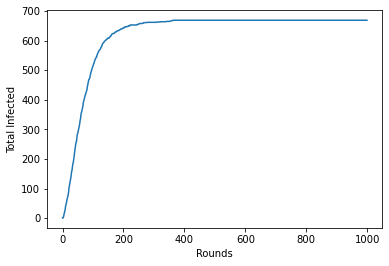

In [18]:
#Question_A = simulator(rounds, N, gamma, beta, adj_matrix)    
print("Question b part 1")
#question_B = QuestionB(rounds, N, gamma, beta, adj_matrix, V1 )
#print("Question b part 2")
question_B_v2 = QuestionB(rounds, N, gamma, beta, adj_matrix, .95 )
